In [10]:
import pandas as pd
import numpy as np


In [11]:
train = pd.read_csv('mnist_train.csv', header=None)
labels = train.iloc[0:10000, 0]
images = train.iloc[0:10000, 1:]

test = pd.read_csv('mnist_train.csv', header=None)
test_labels = test.iloc[:, 0]
test_images = test.iloc[:, 1:]

#convert from python list into numpy array i.e. 60k to 1 array with each column a 28x28 matrix
#label = label.astype(np.uint8)
#images = np.array(images).reshape((-1, 1, 28, 28)).astype(np.uint8)

## PCA

In [12]:
from sklearn.decomposition import PCA

COMPONENT_NUM = 35
pca = PCA(n_components=COMPONENT_NUM, whiten=True)
pca.fit(images)
imagesPCA = pca.transform(images)


array([ 0.10200027,  0.17415466,  0.23526222,  0.28941855,  0.33717981,
        0.38131571,  0.41414318,  0.44341522,  0.47126216,  0.49433565,
        0.51563088,  0.53617457,  0.55304442,  0.56986254,  0.58602985,
        0.60141551,  0.61429455,  0.62693185,  0.63852232,  0.6497997 ,
        0.66013879,  0.67021698,  0.67966184,  0.68889638,  0.69744535,
        0.70587578,  0.71391221,  0.72166867,  0.72887219,  0.73572575,
        0.74225238,  0.74854619,  0.75449134,  0.76036657,  0.76588184])

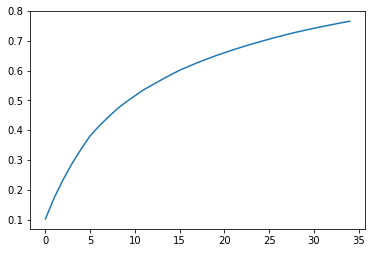

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

var_explained = pca.explained_variance_ratio_.cumsum()
plt.plot(var_explained)
var_explained

In [14]:
imagesPCA.shape

(10000, 35)

In [15]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(imagesPCA, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
test_imagesPCA = pca.transform(test_images)
test_predict = svc.predict(test_imagesPCA)

In [17]:
test_predict.shape

(60000,)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, test_predict)

0.96878333333333333